In [12]:
# Indeed scraping with Selenium and beautifulSoup

In [2]:
from selenium import webdriver
import pandas as pd 
from bs4 import BeautifulSoup
import requests
from selenium.common.exceptions import ElementClickInterceptedException, TimeoutException, NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait

from lxml.html import fromstring
import requests
import urllib 
from itertools import cycle
import traceback

In [11]:
########--WORKINGGGGGGGGGGGGGG--#########

driver = webdriver.Chrome('/Users/carolinetvergaard/Desktop/NLP/scraping/chromedriver')
#here you have to download chrome driver and put it in the same folder as script, and give path :-) 
dataframe = pd.DataFrame(columns=["Title","Location","Company","Salary","Description", "Sector"])


for i in range(0,1800,3): # this goes from 0 to 5000 with increments of 10 (tried to change to avoid duplicates)
    
    driver.get("https://au.indeed.com/jobs?q=receptionist&l=Australia&start="+str(i))
    
    driver.implicitly_wait(10)

    all_jobs = driver.find_elements_by_class_name('result')
    
    for job in all_jobs:
        result_html = job.get_attribute('innerHTML')
        soup = BeautifulSoup(result_html,'html.parser')
    try:
        title = soup.find("a",class_="jobtitle").text.replace('\n','')
    except:
        title = 'None'

    try:
        location = soup.find(class_="location").text
    except:
        location = 'None'

    try:
        company = soup.find(class_="company").text.replace("\n","").strip()
    except:
        company = 'None'

    try:
        salary = soup.find(class_="salary").text.replace("\n","").strip()
    except:
        salary = 'None'
    
    sum_div = job.find_elements_by_class_name("summary")[0]
    
    try:
        sum_div.click()
    except:
        close_button = driver.find_elements_by_class_name("popover-x-button-close")[0]
        close_button.click()
        sum_div.click()
        
    try:
        job_desc = driver.find_element_by_id('vjs-desc').text
    except:
        job_desc = 'None'
    sector = "Receptionist"

    dataframe = dataframe.append({'Title':title,'Location':location,"Company":company,"Salary":salary,"Description":job_desc, "Sector":sector},ignore_index=True)

    dataframe.to_csv("receptionist.csv",index=False)

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=86.0.4240.198)


In [ ]:
from lxml.html import fromstring
import requests
from itertools import cycle
import traceback

def get_proxies():
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    parser = fromstring(response.text)
    proxies = set()
    for i in parser.xpath('//tbody/tr')[:10]:
        if i.xpath('.//td[7][contains(text(),"yes")]'):
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
    return proxies


#If you are copy pasting proxy ips, put in the list below
#proxies = ['121.129.127.209:80', '124.41.215.238:45169', '185.93.3.123:8080', '194.182.64.67:3128', '106.0.38.174:8080', '163.172.175.210:3128', '13.92.196.150:8080']
proxies = get_proxies()
proxy_pool = cycle(proxies)

url = 'https://httpbin.org/ip'
for i in range(1,11):
    #Get a proxy from the pool
    proxy = next(proxy_pool)
    print("Request #%d"%i)
    try:
        response = requests.get(url,proxies={"http": proxy, "https": proxy})
        print(response.json())
    except:
        #Most free proxies will often get connection errors. You will have retry the entire request using another proxy to work. 
        #We will just skip retries as its beyond the scope of this tutorial and we are only downloading a single url 
        print("Skipping. Connnection error")

Pre-processing data...
Building stopwords...
Generating wordcloud...


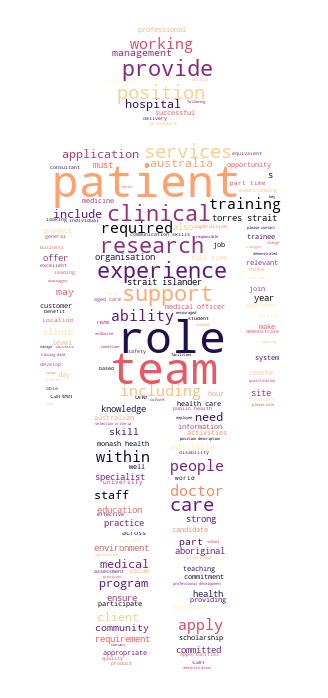

In [48]:


#--------------------Importing modules------------------ #

#%%
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from stop_words import get_stop_words
from PIL import Image
import pandas as pd
import numpy as np
import re


# ------------------Setting parameters-------------------#

#%% 
# --------Data

data = pd.read_csv('doctor.csv')

# --------Cloud

cloud_color = "magma"      # Set wordcloud color scheme ('Wistia' or 'OrRd' are nice! YlGn is great for ayahuasca!)
cloud_bg_color = "white"    # Set background color ("#182a2a" is a nice, dark green!)

cloud_custom_font = False  # AdobeGothicStd-Bold.otf is nice, missing special chars
#cloud_font_path = "Fonts/"
#cloud_font = "CUTE-FROG.ttf" # 'SpicyRice-Regular.ttf' = LSD. 'Jungle.oft'/'Cute Bunny.otf' = Aya.

cloud_masked = True         # If True: will mask cloud on image set below
cloud_mask = np.array(Image.open("Masks/ma.png"))

cloud_scale = 0             # Scale word size mainly by rank (0) to frequency (1) 
cloud_horizontal = 1        # Ratio of word angles from horizontal (1) to vertical (0) 
bigrams = True

# --------Save

save = False            # If True: Will save image to directory

filename = "file"

filename = filename + "_cloudcolor-" + cloud_color
filename = filename + "_bgcolor-" + cloud_bg_color
# if cloud_custom_font == True:
#     filename = filename + "_font-" + cloud_font




# -------------------------------------------------------#
# --------------- DON'T CHANGE PAST HERE ----------------#
# -------------------------------------------------------#


# -------------------------------------------------------#
#                     Pre-processing                     #
# -------------------------------------------------------#
print("Pre-processing data...")
#--------------------------------------------------------#

data['text_processed'] = data['Description'].map(lambda x: re.sub('[,\.!?]', '', x)) # Remove punctuation
data['text_processed'] = data['text_processed'].map(lambda x: x.lower()) # Convert to lowercase


# -------------------------------------------------------#
#                Building stop-word library              #
# -------------------------------------------------------#
print("Building stopwords...")
#--------------------------------------------------------#

stop_words_en = get_stop_words('en')
stop_words_es = get_stop_words('es')
stop_words_pt = get_stop_words('pt')

stop_words_add = ['will', 'just','got','get', 'work', 'service']

stop_words = stop_words_en
stop_words.extend(stop_words_es)
stop_words.extend(stop_words_pt)
stop_words.extend(stop_words_add)
stop_words = set(stop_words)

# -------------------------------------------------------#
#                    Building wordcloud                  #
# -------------------------------------------------------#
print("Generating wordcloud...")
#--------------------------------------------------------#

#cloud_font = cloud_font_path + cloud_font # Joining font path with font name

long_string = ','.join(list(data['text_processed'].values)) # Join processed text

if cloud_masked == False:   # If True: will plot cloud on image mask; else none
    cloud_mask = None     

if cloud_custom_font == False:   # If True: will plot cloud on image mask; else none
    cloud_font = None     

# Setting up wordcloud from previously set variables.
wordcloud = WordCloud(collocations=bigrams, font_path = cloud_font, mask = cloud_mask, regexp=None, relative_scaling=cloud_scale, prefer_horizontal=cloud_horizontal, width = 500 , height = 500, background_color=cloud_bg_color, max_words=10000, contour_width=0, colormap  =cloud_color, stopwords = stop_words)



# Generating wordcloud. To use tokenized words, use 'wordcloud.generate_from_frequencies'
wordcloud.generate(long_string)

#wordcloud.recolor(color_func="#83c681")

if save == True:            # Save image to path
    print("Saving file...")
    filename = "./Wordclouds/" + filename + ".png"
    wordcloud.to_file(filename)
    print ("File saved as:", filename)
    print("DONE")


wordcloud.to_image()






# -----------------------------------------------------------




# Plotting with color of background image

# #--------------------------------------------
# import matplotlib.pyplot as plt


# # create coloring from image
# image_colors = ImageColorGenerator(ayahuasca_mask)

# # show
# fig, axes = plt.subplots(1, 3)
# axes[0].imshow(wordcloud, interpolation="bilinear")
# # recolor wordcloud and show
# # we could also give color_func=image_colors directly in the constructor
# axes[1].imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
# axes[2].imshow(ayahuasca_mask, cmap=plt.cm.gray, interpolation="bilinear")
# for ax in axes:
#     ax.set_axis_off()
# plt.show()

# %%